##  6.2: Exploring Relationships ***

# Task Step 1 - Import Visualization Libraries & Data

In [1]:
#0.1 importing Labraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import plotly.express as px
import cufflinks as cf
### Clear Warning
import warnings; 
warnings.simplefilter('ignore')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

C:\Users\bukola\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [2]:
df_superstore = pd.read_csv(r"C:\Users\bukola\Documents\CF\6.1 Sourcing Open Data\Prepared Data\Superstore_clean.csv")

In [3]:
df_superstore.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df_superstore.shape

(9994, 21)

In [5]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9994 non-null   int64  
 1   Row ID        9994 non-null   int64  
 2   Order ID      9994 non-null   object 
 3   Order Date    9994 non-null   object 
 4   Ship Date     9994 non-null   object 
 5   Ship Mode     9994 non-null   object 
 6   Customer ID   9994 non-null   object 
 7   Segment       9994 non-null   object 
 8   Country       9994 non-null   object 
 9   City          9994 non-null   object 
 10  State         9994 non-null   object 
 11  Postal Code   9994 non-null   int64  
 12  Region        9994 non-null   object 
 13  Product ID    9994 non-null   object 
 14  Category      9994 non-null   object 
 15  Sub-Category  9994 non-null   object 
 16  Product Name  9994 non-null   object 
 17  Sales         9994 non-null   float64
 18  Quantity      9994 non-null 

In [6]:
df_superstore.columns

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df_superstore_sub = df_superstore.drop(['Unnamed: 0','Row ID','Ship Mode','Customer ID', 'Segment', 'Country', 'City', 'State',
     'Region', 'Product ID', 'Category', 'Sub-Category','Order ID', 'Ship Date','Order Date',
       'Product Name'], axis = 1)

# Task Step 2 - Pick Variables

In [8]:
df_superstore_sub.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


In [9]:
df_superstore_sub.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


# Task Step 3 - Create Correlation Matrix Heatmap

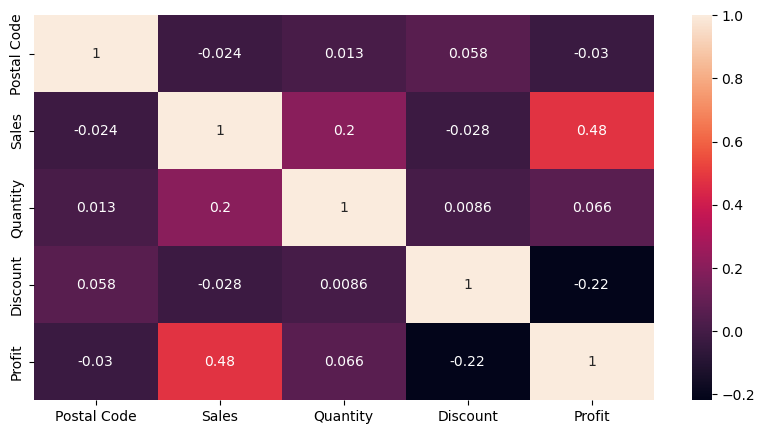

In [10]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,5))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(df_superstore_sub.corr(), annot = True, ax = ax)

#It appears that purple color in the correlation analysis signifies no relationship (0), while dark purple and black indicate negative correlations, and orange and light orange represent positive correlations. In this context, sales demonstrate a positive correlation with profit. Consequently, sales will be considered the dependent variable, while any other variable impacting profit will be deemed independent.

Comparing with postal code reveals a negative coefficient, suggesting that increased distance between stores and buyers may adversely affect sales through logistics. Greater distance results in higher logistic expenses, negatively impacting profit.

Similarly, in the case of discounts, a negative coefficient indicates that higher discounts on sales result in lower profits.

However, when quantity is compared with sales, there is no coefficient relationship, indicating that the quantity of purchase has no discernible impact on sales.

# Task Step 4 - Scatterplots

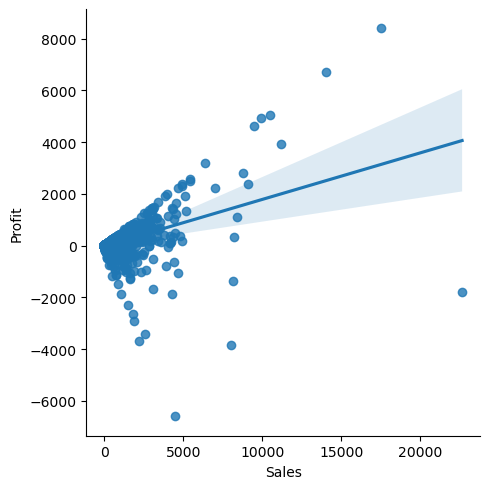

In [16]:
#Scatterplot of most correlated variables
# sales and profit scatterplot
sns.lmplot(x = 'Sales', y = 'Profit', data = df_superstore)

# Task Step 5 - Pair Plots

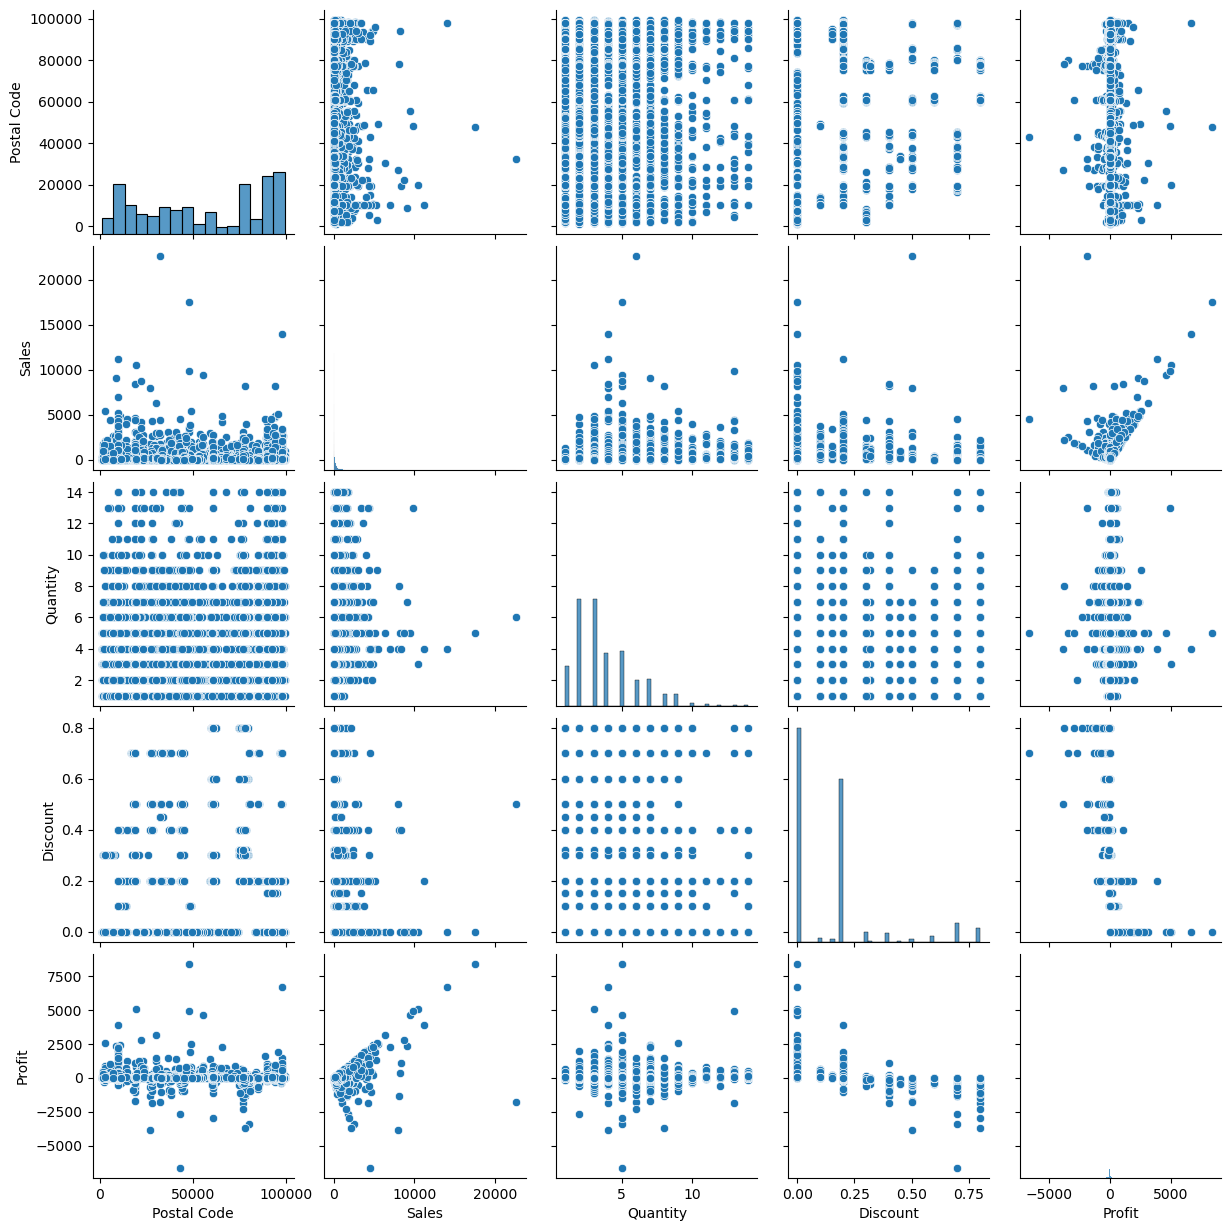

In [11]:
# Creating a pairplot
pair_plot = sns.pairplot(df_superstore_sub)

#The pair plot reveals that the relationships between the variables are not strongly pronounced. To gain deeper insights, I intend to explore specific variables further through categorical plots. The focus will be on comparing other features to profit and sales, aiming to visually understand the factors that most significantly influence both profit and sales.

In [12]:
# To read the data as a time series, we have to pass special arguments to the read_csv command:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')

In [13]:
#Convert Order Date to Datetime
df_superstore['Ship Date']= pd.to_datetime(df_superstore['Ship Date'])
#Create a Month Year Column
df_superstore['Year'] = df_superstore['Ship Date'].apply(lambda x: x.strftime('%Y'))

In [14]:
#Convert Order Date to Datetime
df_superstore['Order Date']= pd.to_datetime(df_superstore['Order Date'])
#Create a Month Year Column
df_superstore['Year'] = df_superstore['Order Date'].apply(lambda x: x.strftime('%Y'))
df_superstore['Month'] = df_superstore['Order Date'].apply(lambda x: x.strftime('%Y''%M'))
df_superstore['Month'] = pd.to_datetime(df_superstore['Order Date']).dt.strftime('%B')

In [15]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    9994 non-null   int64         
 1   Row ID        9994 non-null   int64         
 2   Order ID      9994 non-null   object        
 3   Order Date    9994 non-null   datetime64[ns]
 4   Ship Date     9994 non-null   datetime64[ns]
 5   Ship Mode     9994 non-null   object        
 6   Customer ID   9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  Postal Code   9994 non-null   int64         
 12  Region        9994 non-null   object        
 13  Product ID    9994 non-null   object        
 14  Category      9994 non-null   object        
 15  Sub-Category  9994 non-null   object  

In [16]:
df_superstore.columns

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month'],
      dtype='object')

In [17]:
df_superstore.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017,November
1,1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017,November
2,2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017,June
3,3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016,October
4,4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016,October


In [18]:
df_superstore.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
0,0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017,November
1,1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017,November
2,2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017,June
3,3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016,October
4,4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016,October


In [19]:
#changing data type to category
df_superstore['Country']=df_superstore['Country'].astype('category')
df_superstore['State']=df_superstore['State'].astype('category')
df_superstore['Region']=df_superstore['Region'].astype('category')

In [20]:
#checking data type
df_superstore.dtypes

Unnamed: 0               int64
Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Ship Date       datetime64[ns]
Ship Mode               object
Customer ID             object
Segment                 object
Country               category
City                    object
State                 category
Postal Code              int64
Region                category
Product ID              object
Category                object
Sub-Category            object
Product Name            object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
Year                    object
Month                   object
dtype: object

In [21]:
#category compared 
category_df= pd.DataFrame(df_superstore.groupby(['Category'])[['Sales','Profit']].sum())
Region_df = pd.DataFrame(df_superstore.groupby(['Region'])[['Sales','Profit']].sum())
Sub_Category_df = pd.DataFrame(df_superstore.groupby(['Sub-Category'])[['Sales','Profit']].sum())
Year_df = pd.DataFrame(df_superstore.groupby(['Year'])[['Sales','Profit']].sum())
State_df = pd.DataFrame(df_superstore.groupby(['State'])[['Sales','Profit']].sum())


In [22]:
category_df

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8012
Technology,836154.0330,145454.9481


In [23]:
#region sales and profit compared
Region_df = pd.DataFrame(df_superstore.groupby(['Region'])[['Sales','Profit']].sum())
Sub_Category_df = pd.DataFrame(df_superstore.groupby(['Sub-Category'])[['Sales','Profit']].sum())
Year_df = pd.DataFrame(df_superstore.groupby(['Year'])[['Sales','Profit']].sum())

In [24]:
Region_df

,Sales,Profit
Region,,
Central,501239.8908,39706.3627
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4491


In [25]:
#sub-category sales and profit compared
Sub_Category_df

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7871
Binders,203412.7330,30221.7634
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5184


In [26]:
# year sales and profit compared
Year_df

,Sales,Profit
Year,,
2015,484247.4981,49543.9741
2016,470532.5090,61618.6039
2017,609205.5980,81795.1743
2018,733215.2552,93439.2698


In [27]:
# states sales and profit compared
State_df

,Sales,Profit
State,,
Alabama,19510.6400,5786.8253
Arizona,35282.0010,-3427.9246
Arkansas,11678.1300,4008.6871
California,457687.6315,76381.3871
Colorado,32108.1180,-6527.8579
Connecticut,13384.3570,3511.4918
Delaware,27451.0690,9977.3748
District of Columbia,2865.0200,1059.5893
Florida,89473.7080,-3399.3017


# Task O6 Creating categorical plot and interpret the results

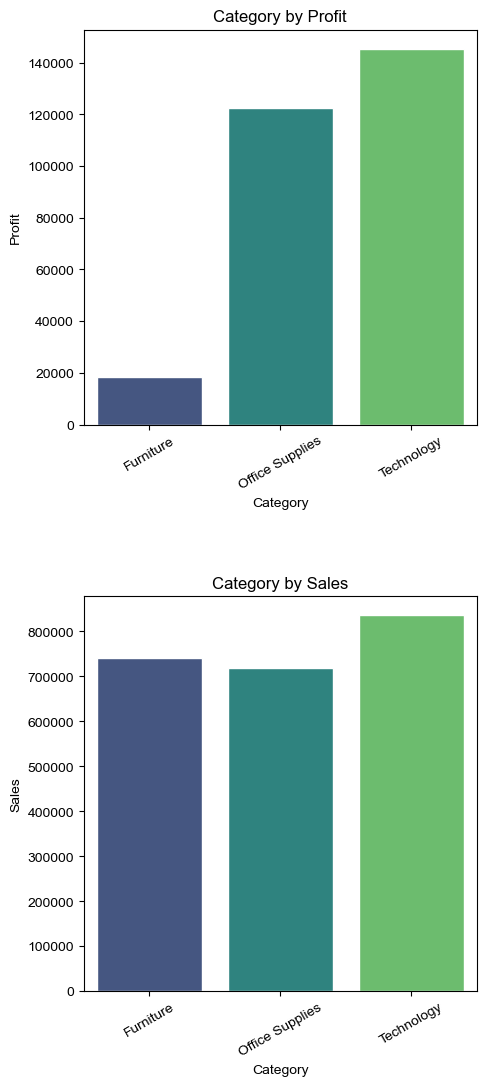

In [28]:
# category sales and profit chat 
fig, axes = plt.subplots(2,1, figsize=(6,12))
sns.set_theme(style="darkgrid")
axes[0].set_title("Category by Profit")
axes[1].set_title("Category by Sales")

sns.barplot(x=category_df.index,
           y=category_df['Profit'],
           data= category_df,
             palette='viridis',
           ax = axes[0]);

sns.barplot(x=category_df.index,
           y=category_df['Sales'],
           data= category_df,
             palette='viridis',
           ax = axes[1]);

axes[0].set_xticklabels(category_df.index, rotation=30)
axes[1].set_xticklabels(category_df.index, rotation=30)

plt.tight_layout(pad=4)

Technology and office supplies contributed 50% and 43% of the profit, respectively, whereas furniture only accounted for 7% of the profit despite having almost the same sales contribution (36%, 31%, and 33%, respectively). It is evident that technology and office supplies are more profitable for the stores compared to their sales levels. Therefore, it is recommended to channel efforts into these categories to maximize overall profit.

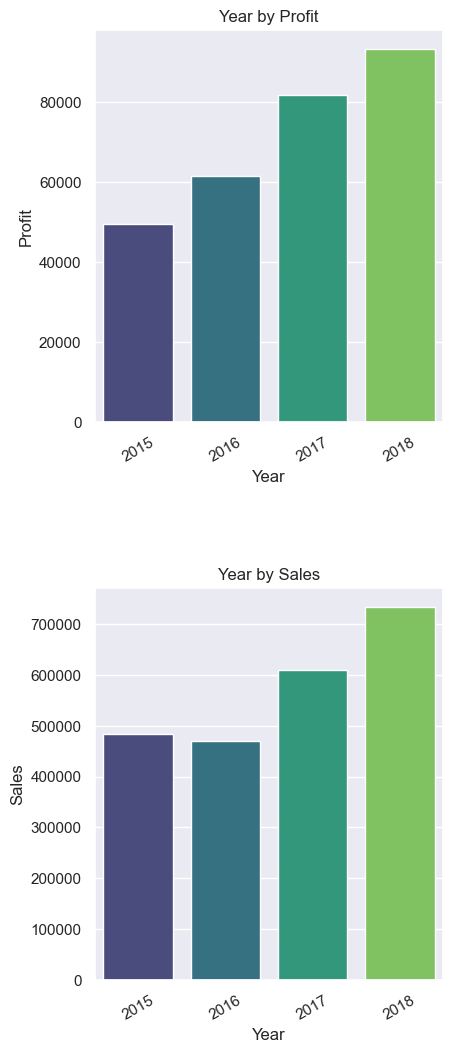

In [29]:
# comparing the sales trend over the years 
fig, axes = plt.subplots(2,1, figsize=(6,12))
sns.set_theme(style="darkgrid")
axes[0].set_title("Year by Profit")
axes[1].set_title("Year by Sales")

sns.barplot(x=Year_df.index,
           y=Year_df['Profit'],
           data= Year_df,
             palette='viridis',
           ax = axes[0]);

sns.barplot(x=Year_df.index,
           y=Year_df['Sales'],
           data= Year_df,
             palette='viridis',
           ax = axes[1]);

axes[0].set_xticklabels(Year_df.index, rotation=30)
axes[1].set_xticklabels(Year_df.index, rotation=30)

plt.tight_layout(pad=5)

Overall, there has been a consistent increase in sales over the years, and this growth is mirrored by a proportional increase in profit.

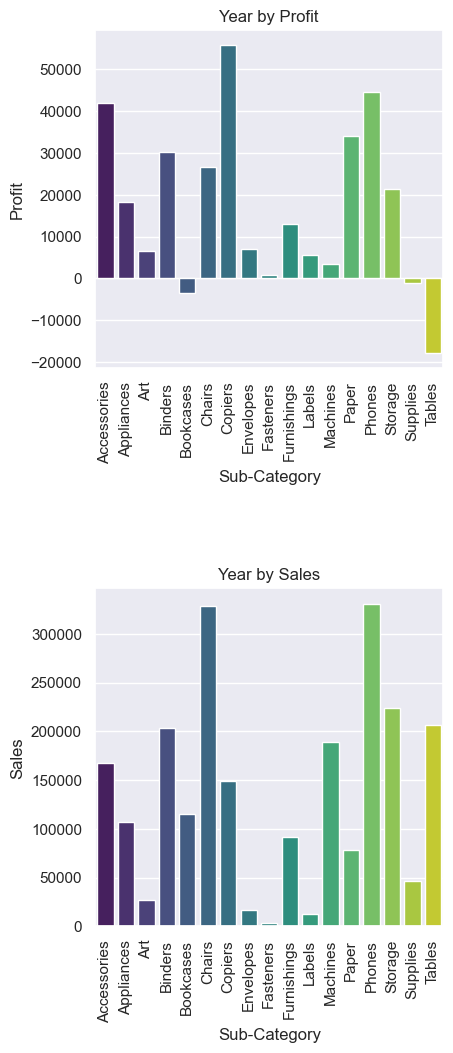

In [33]:
# comparing the sales trend over the years 
fig, axes = plt.subplots(2,1, figsize=(6,12))
sns.set_theme(style="darkgrid")
axes[0].set_title("Year by Profit")
axes[1].set_title("Year by Sales")

sns.barplot(x=Sub_Category_df.index,
           y=Sub_Category_df['Profit'],
           data= Sub_Category_df,
             palette='viridis',
           ax = axes[0]);

sns.barplot(x=Sub_Category_df.index,
           y=Sub_Category_df['Sales'],
           data= Sub_Category_df,
             palette='viridis',
           ax = axes[1]);

axes[0].set_xticklabels(Sub_Category_df.index, rotation=90)
axes[1].set_xticklabels(Sub_Category_df.index, rotation=90)

plt.tight_layout(pad=5)

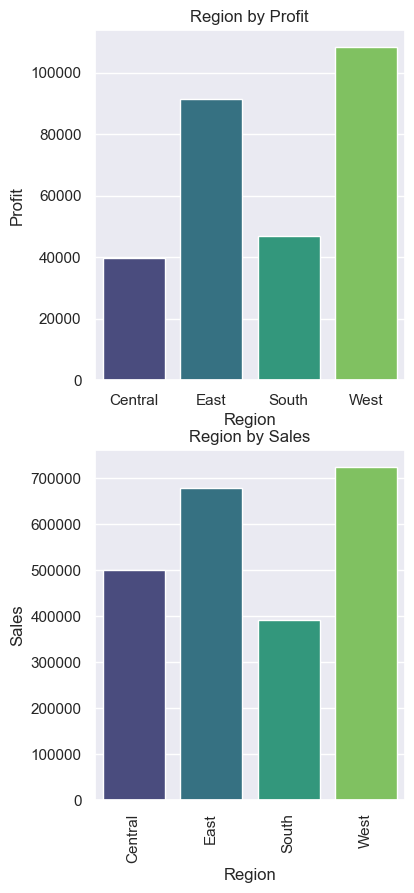

In [100]:
fig, axes = plt.subplots(2,1, figsize=(4,10))
sns.set_theme(style="darkgrid")
axes[0].set_title("Region by Profit")
axes[1].set_title("Region by Sales")

sns.barplot(x=Region_df.index,
           y=Region_df['Profit'],
           data= Region_df,
             palette='viridis',
           ax = axes[0]);



sns.barplot(x=Region_df.index,
           y=Region_df['Sales'],
           data= Region_df,
             palette='viridis',
           ax = axes[1]);

axes[0].set_xticklabels(Region_df.index, rotation=0)
axes[1].set_xticklabels(Region_df.index, rotation=90)

plt.tight_layout(pad=15)

The bar chart analysis reveals that the East and West regions significantly contribute to the company's financial performance. These regions emerge as crucial drivers of the company's success, playing pivotal roles in both revenue generation and profitability.

In [43]:
Month_df = pd.DataFrame(df_superstore.groupby(['Month'])[['Sales','Profit']].sum())

In [44]:
Month_df

,Sales,Profit
Month,,
April,137762.1286,11587.4363
August,159044.0630,21776.9384
December,325293.5035,43369.1920
February,59751.2514,10294.6107
January,94924.8356,9134.4461
July,147238.0970,13832.6649
June,152718.6793,21285.7954
March,205005.4888,28594.6872
May,155028.8117,22411.3078


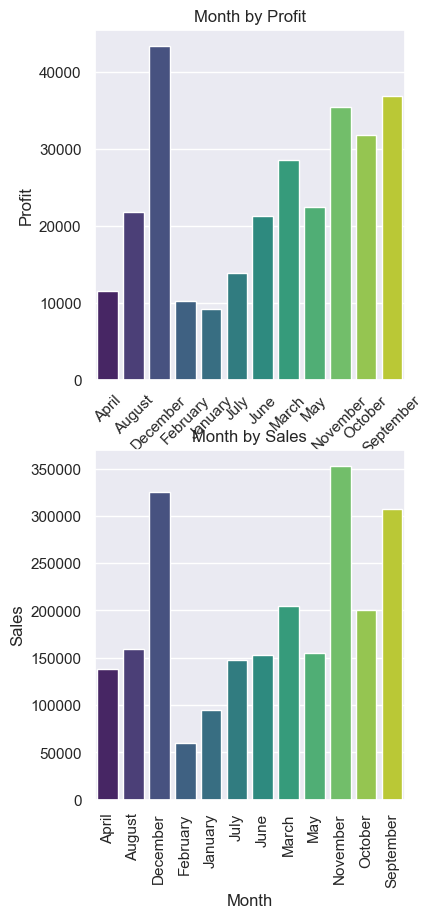

In [46]:
fig, axes = plt.subplots(2,1, figsize=(4,10))
sns.set_theme(style="darkgrid")
axes[0].set_title("Month by Profit")
axes[1].set_title("Month by Sales")

sns.barplot(x=Month_df.index,
           y=Month_df['Profit'],
           data= Month_df,
             palette='viridis',
           ax = axes[0]);



sns.barplot(x=Month_df.index,
           y=Month_df['Sales'],
           data= Region_df,
             palette='viridis',
           ax = axes[1]);

axes[0].set_xticklabels(Month_df.index, rotation=45)
axes[1].set_xticklabels(Month_df.index, rotation=90)

plt.tight_layout(pad=15)

sales and profit has its peak in december with a gradual rise from september which shows that most of the product are more like seasonal product. 

In [53]:
Segment_df = pd.DataFrame(df_superstore.groupby(['Segment'])[['Sales','Profit']].sum())

In [54]:
Segment_df

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2093
Corporate,7.061464e+05,91979.1342
Home Office,4.296531e+05,60298.6786


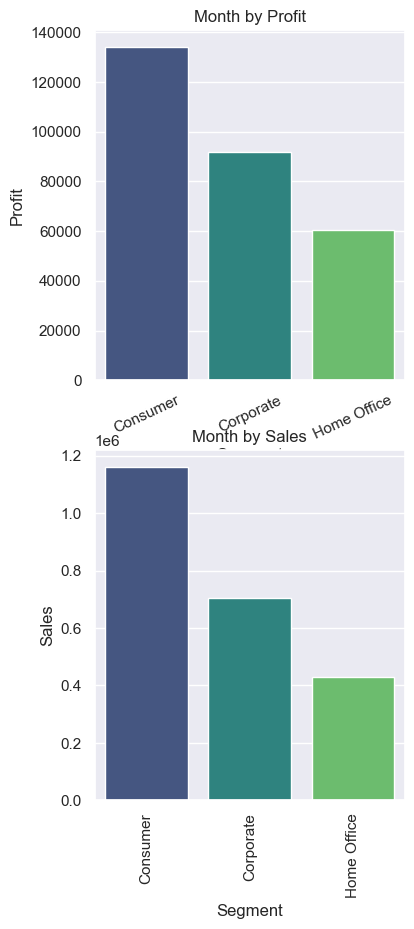

In [56]:
# sales and profit compare by segment 
fig, axes = plt.subplots(2,1, figsize=(4,10))
sns.set_theme(style="darkgrid")
axes[0].set_title("Month by Profit")
axes[1].set_title("Month by Sales")

sns.barplot(x=Segment_df.index,
           y=Segment_df['Profit'],
           data= Segment_df,
             palette='viridis',
           ax = axes[0]);



sns.barplot(x=Segment_df.index,
           y=Segment_df['Sales'],
           data= Segment_df,
             palette='viridis',
           ax = axes[1]);

axes[0].set_xticklabels(Segment_df.index, rotation=25)
axes[1].set_xticklabels(Segment_df.index, rotation=90)

plt.tight_layout(pad=15)

The bulk of sales originates from consumer products, followed by corporate, with home office products being given lower priority. This trend is mirrored in the profit, where consumer and corporate products make more substantial contributions.

In [57]:
Ship_Mode_df=pd.DataFrame(df_superstore.groupby(['Ship Mode'])[['Sales','Profit']].sum())

In [58]:
Ship_Mode_df

,Sales,Profit
Ship Mode,,
First Class,3.514284e+05,48969.8399
Same Day,1.283631e+05,15891.7589
Second Class,4.591936e+05,57446.6356
Standard Class,1.358216e+06,164088.7877


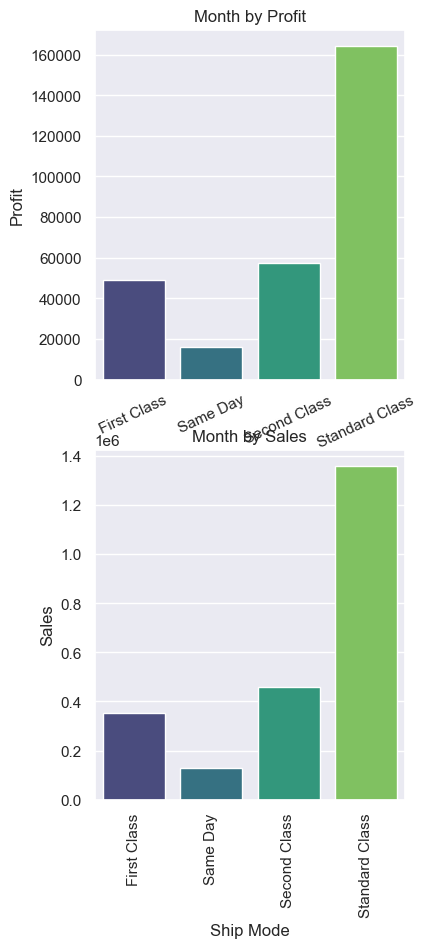

In [59]:
# sales and profit compare by ship mode 
fig, axes = plt.subplots(2,1, figsize=(4,10))
sns.set_theme(style="darkgrid")
axes[0].set_title("Month by Profit")
axes[1].set_title("Month by Sales")

sns.barplot(x=Ship_Mode_df.index,
           y=Ship_Mode_df['Profit'],
           data= Ship_Mode_df,
             palette='viridis',
           ax = axes[0]);



sns.barplot(x=Ship_Mode_df.index,
           y=Ship_Mode_df['Sales'],
           data= Ship_Mode_df,
             palette='viridis',
           ax = axes[1]);

axes[0].set_xticklabels(Ship_Mode_df.index, rotation=25)
axes[1].set_xticklabels(Ship_Mode_df.index, rotation=90)

plt.tight_layout(pad=15)

Standard class is the most frequently used shipping mode by customers, contributing significantly to both sales and profit. Following this, second class, first class, and same-day modes are used in that respective order. 

# Task O7 Research Questions

Yes, the analysis has provided insights into the sales trend evolution from 2015 to 2019. It has also identified peak sales periods and seasonal variations within the dataset. Additionally, correlations between specific factors like shipping mode and customer segments with sales performance have been explored. Lastly, the impact on sales associated with various customer segments has been discerned from the analysis.

# Task O8 Hypothesis 

1) Null Hypothesis (H0): Shipping mode does not affect profit.
Alternative Hypothesis (H1): Certain shipping modes contribute more significantly to profit

2) Null Hypothesis (H0): There is no significant seasonal impact on both sales and profit.
Alternative Hypothesis (H1): Seasonal variations significantly influence both sales and profit.

3) Null Hypothesis (H0): Seasonal variations do not significantly impact both sales and profit.
Alternative Hypothesis (H1): Seasonal variations have a significant impact on both sales and profit.

4) Null Hypothesis (H0): Discounts do not have a significant impact on overall profit.
Alternative Hypothesis (H1): Profit is significantly influenced by the application of discounts.
